# Breast Cancer Wisconsin Dataset Analysis

This notebook provides an exploratory data analysis (EDA) and basic modeling for the Breast Cancer Wisconsin dataset. The goal is to understand the data, visualize important features, and build a simple classification model.

## Data Loading

We will load the dataset and take a first look at its structure.

In [22]:
import pandas as pd
import numpy as np
import yaml
import os
import sys
from pathlib import Path

# Ensure the project root is in the system path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

# Load the configuration file
with open(os.path.join(project_root, 'conf.yaml'), 'r') as file:
    config = yaml.safe_load(file)

# Load the breast cancer dataset
data_path = config.get('csv_name', 'breast_cancer.csv')

# Check if the CSV file exists
csv_path = Path(project_root, 'data', data_path)
if not csv_path.exists():
    raise FileNotFoundError(f"CSV file not found: {csv_path}")

df = pd.read_csv(csv_path)

## Data Overview

Let's check the first few rows, the shape of the dataset, and basic statistics.

In [23]:
# Show the first few rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
# Show the shape of the dataset
print("Shape of the dataset:", df.shape)

# Show basic statistics
df.describe()

Shape of the dataset: (569, 33)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Missing Values and Data Types

We will inspect missing values and data types to understand data quality.

In [32]:
# Show only columns with at least one null value and their null counts
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
print("Columns with nulls and their null counts:")
print(null_counts)

# Show unique data types, their counts, and which columns have each dtype
dtype_counts = df.dtypes.value_counts()
print("\nUnique data types and their counts:")
print(dtype_counts)

print("\nColumns for each dtype:")
for dtype in dtype_counts.index:
    cols = df.columns[df.dtypes == dtype].tolist()
    print(f"{dtype}: {cols}")

Columns with nulls and their null counts:
Unnamed: 32    569
dtype: int64

Unique data types and their counts:
float64    31
int64       1
object      1
Name: count, dtype: int64

Columns for each dtype:
float64: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
int64: ['id']
object: ['diagnosis']


### Data Cleaning Decisions

Based on the results above:

1. There is an empty column in the dataset. I should remove this column.
2. There is an unnecessary column named 'id'. I should remove this column as well.
3. The label (target) column is categorical. I should convert it to numeric using a label encoder.


## Target Variable Distribution

Let's visualize the distribution of the target variable (malignant/benign).

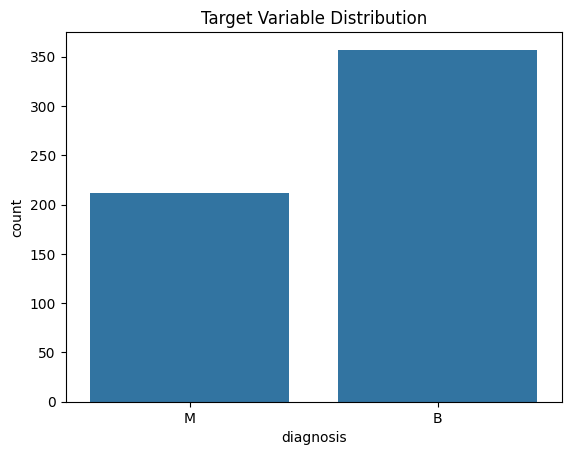

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the configuration file
with open(os.path.join(project_root, 'conf.yaml'), 'r') as file:
    config = yaml.safe_load(file) 

target_col = config.get('target_col', 'diagnosis')


target_col = config.get('target_col', 'diagnosis')
sns.countplot(x=target_col, data=df)
plt.title('Target Variable Distribution')
plt.show()

## Feature Distributions

We will plot the distributions of key features to understand their ranges and patterns.

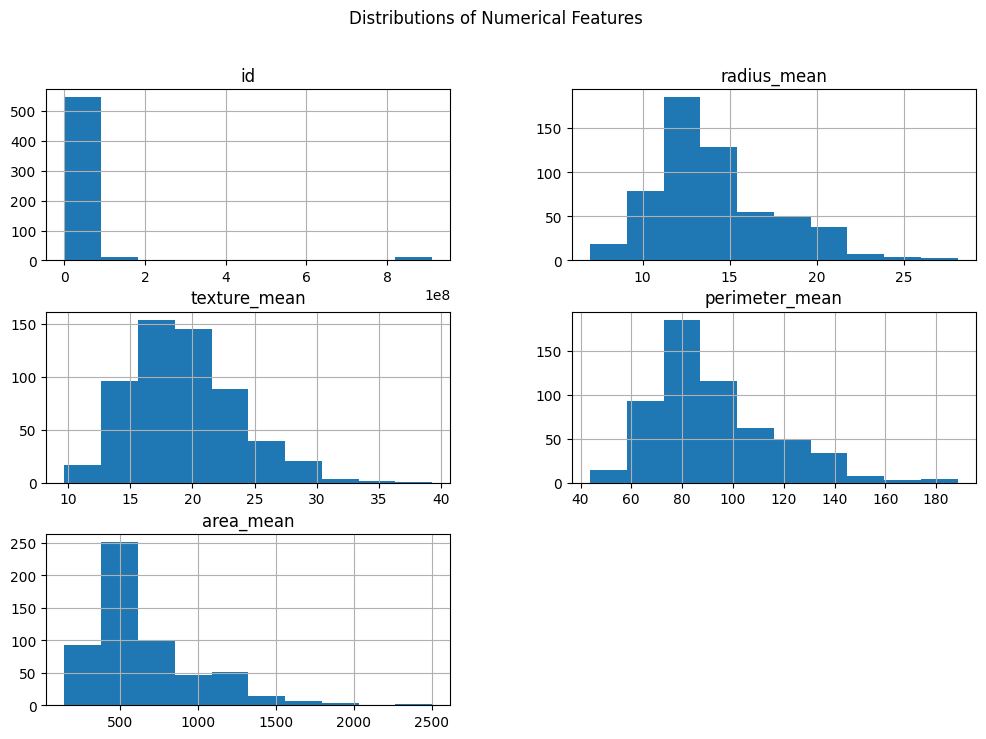

In [9]:
# Plot distributions for the first 5 numerical features
num_features = df.select_dtypes(include='number').columns[:5]
df[num_features].hist(figsize=(12, 8))
plt.suptitle('Distributions of Numerical Features')
plt.show()

## Correlation Analysis

Let's examine the correlation between features and the target variable.

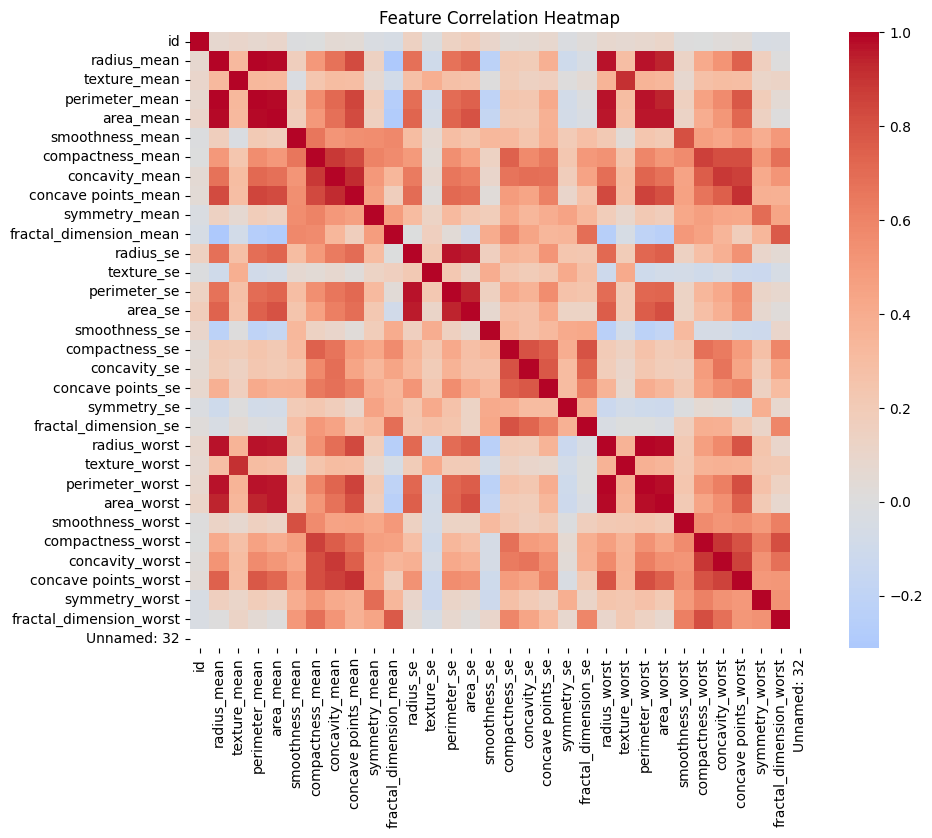

In [10]:
# Correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

**Insights:**

- Some features show strong positive or negative correlation with the target variable.
- Since the dataset is small, feature extraction may be necessary to improve model performance.
- Highly correlated features may provide redundant information; consider feature selection or dimensionality reduction if needed.
- Features with little or no correlation to the target may have limited predictive power.


# Conclusion

Based on my data analysis, I decided to take the following preprocessing steps:

- Remove unnecessary columns from the dataset
- Convert the categorical label to a numeric format
- Apply feature extraction to address the small dataset size
- Add feature selection to eliminate features with poor correlation